## Homework 10

#### *DATA 1010*

In [0]:
using Random, LinearAlgebra, Statistics
using Distributions, Plots, LaTeXStrings
gr(fontfamily = "Palatino");

---

## Problem 1



Consider the XOR classification problem. We have to find a decision boundary separating points labelled in blue and red, shown below:

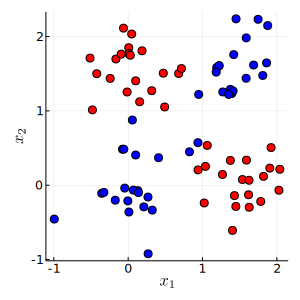

In [1]:
Random.seed!(123)

blue_points = [
    rand(MvNormal([1.5; 1.5], [[0.1 0.0]; [0.0 0.1]]), 20)';
    rand(MvNormal([0.0; 0.0], [[0.1 0.0]; [0.0 0.1]]), 20)'
]

red_points = [
    rand(MvNormal([1.5; 0.0], [[0.1 0.0]; [0.0 0.1]]), 20)';
    rand(MvNormal([0.0; 1.5], [[0.1 0.0]; [0.0 0.1]]), 20)'
]

plot(xlabel=L"x_1", ylabel=L"x_2", legend = false, ratio = 1, size = (300, 300))
scatter!(blue_points[:,1], blue_points[:,2], color=:blue)
scatter!(red_points[:,1], red_points[:,2], color=:red)

(a) For each of the following models, determine whether the model is an appropriate choice for solving the XOR classification problem: LDA, QDA, Naive Bayes, Linear SVM, Kernelized SVM, Logistic Regression, Decision Tree. Provide a brief justification for your answer. 

(b) Explore different architectures on [Tensorflow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.40593&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) to find the smallest neural network that can accurately classify these points. Write down the weights and biases of each hidden layer as a matrix. Draw a diagram illustrating the architecture you selected and write an expression for the function ($x_1$ and $x_2$) that computes the output of the final layer. 

--- 

## Problem 2

In this exercise we explore the connection between SVM and single-layer perceptron model.

Suppose we have a training dataset D of size $N$: $$ D = \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \cdots (\mathbf{x}_N, y_N)\}, $$ where $\mathbf{x}_i \in \mathbb{R}^n$, $y_i \in \{+1, -1\}$. Suppose that our points are linearly separable.

Define $\mathbf{w} \in \mathbb{R}^n$ and $b \in \mathbb{R}$. Define $$\Phi(\mathbf{x}, \mathbf{w}, b) = \mathbf{w} \cdot \mathbf{x} + b.$$ 

(a) Find a function $g$ and classification criteria such that $g(\Phi(\mathbf{x}, \mathbf{w}, b))$ and the classification criteria give a logistic regression classifier, an SVM classifier, and a perceptron classifier.

(b) Use the loss functions for perceptron and SVM classifiers to explain why a hard-margin SVM can be viewed as a perceptron with additional penalty terms given a linearly separable classification problem. 

(c) What advantages does the hard-margin SVM have over the single-layer perceptron when it comes to training?

## Problem 3

(a) Consider the coordinates of $n$ points in $\mathbb{R}^p$, organized into an $n\times p$ matrix $A$. Suppose that `U, Σ, V = svd(A .- mean(A, dims=1))`, and explain why `V[:,1:k]'` is the matrix which maps any point in $\mathbb{R}^p$ to its coordinates in the subspace of $\mathbb{R}^p$ spanned by the columns of `V[:,1:k]`. (Note: this one is linear algebra review.)

(b) Plot an image of the *third* principal component for the MNIST dataset. Identify a digit which you think should predominantly have a large or small dot product with this image, and make a scatter plot of which shows the dot product with the first principal component on the $x$-axis and the dot product with the third principal component on the $y$-axis. Check whether your prediction was accurate.

(c) What do you think the 100th principal component might look like, compared to the first few? Display it and check your prediction.

## Problem 4

(a) PCA does not take any measures to separate points from different classes. Come up with an example of a two-class dataset in $\mathbb{R}^2$ with the property that the classes are separable in the original space, but they get all mixed up when projected to the first principal component. Please illustrate your example by generating points and making a scatter plot.

(b) What about t-SNE? Use the `TSne` package to reduce your dataset from 2 dimensions to 1, and plot the results to see how it compares to PCA.

---

## Problem 5

A weather station in Providence classifies each day's weather as "good", "fair", or "poor" according to meteorological data. The following table shows the probabilistic relationship between weather on the current day and the probability of the weather expected on next day conditioned on the type of current day.

current\next | good | fair | poor
------------| -----|-----| ----- 
good | 0.60 | 0.30 | 0.10
fair | 0.50 | 0.25 | 0.25
poor | 0.20 | 0.40 | 0.40

(a) Determine the probability that the weather will be "poor" exactly 3 days after a "good" weather day.

(b) Over a long period of time, what percentage of days can we expect to have "good" weather?

---

## Problem 6

Consider the state space $X = \{0, 1\}^n$ of binary strings having length $n$. Define $p(y, x) = 1/n$ if $y$ differs from $x$ in exactly one bit, and $p(y, x) = 0$ otherwise. 

Suppose we desire an equilibrium distribution $\pi$ for which $\pi(x)$ is proportional to the number of ones that occur in vector $\mathbf{x}$. For example, in the long run, a random walk should visit a string having five 1’s five times as often as it visits a string having only a single 1. 

Provide a general formula for the acceptance ratio $\alpha(x, y)$ that would be used if we were to obtain the desired equilibrium distribution using the Metropolis-Hastings algorithm.

---

## Problem 7

In this exercise, we will develop a MCMC sampler for linear regression. First, we generate some data, assuming the true regression function:

$$ r(x) = -x + 0.2 $$

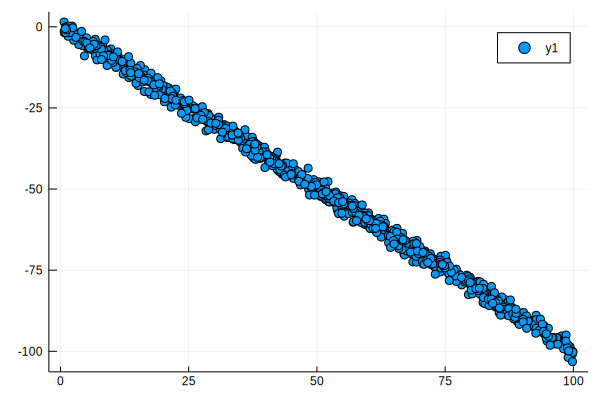

In [2]:
x = rand(Uniform(0, 100), 1000)
y_mean = -x .+ 0.2
y = y_mean + rand(Normal(0, 1.5), 1000)
scatter(x, y)

Use MCMC sampling to fit a linear regression model to predict $y$ given $x$. Use $\mathcal{N}(0, 100)$ prior for the intercept and the slope and $\operatorname{Inv-Gamma}(0.001, 0.001)$ prior for the standard deviation. Generate 10,000 samples for each of the model parameters.

---

## Problem 8

For convenience, define the pdf for a normal distribution as
$$f(x; \mu, \eta) = \left( \frac{\eta}{2\pi} \right)^{\frac{1}{2}} \text{exp}\left(  -\frac{1}{2}\eta(x - \mu)^2 \right).$$

In other words, $\eta$ is a place holder for $\frac{1}{\sigma^2}$. We call $\eta$ the **precision** of a normal distribution.

Suppose we have a prior distribution for the unknown mean of a normal distribution $ N(\mu, \eta_0 ^{-1})$. The prior distribution for this mean $f_M(\mu)$ is given by $N(\mu_0, \eta_{p}^{-1})$. In this problem we will show computationally that the posterior mean $\mu_{\text{post}}$ is weighted sum of the sample mean and the prior mean. In the process, we will derive the posterior variance $\eta_{\text{post}}$ and observe its form.

1. Show that the posterior distribution is proportional to the following expression: 

$$ f_{M; X}(\mu; x) \propto \text{exp}\left( -\frac 12 [n\eta_0(\bar{x} - \mu)^2 + \eta_p(\mu - \mu_0^2)] \right).$$

2. Re-arrange terms to format the expression in the form of a normal distribution. You will find the mean and standard deviation of the posterior distribution:

$$ \mu_{\text{post}} = \frac{n\eta_0\bar{x} + \mu_0 \eta_p}{n \eta_0 + \eta_p}$$ and

$$ \eta_{\text{post}} = n\eta_0 + \eta_p$$

3. Re-write the posterior mean as a weighted sum of $\bar{x}$ and $\mu_0$. Explain how these results agree with the observation that posterior parameters are functions of both the data and the prior distribution.

*Hint:* Without proof, you may use the identity: $\sum_{i=1}^n(x_i - \mu)^2 = \sum_{i=1}^n(x_i - \bar{x})^2 + n(\mu - \bar{x})^2$ in your calculations.